# Projet 4 : Réalisez une étude de santé publique

## 1. Importation des packages 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## 2. Imporation des fichiers csv 

In [2]:
dispo = pd.read_csv('dispo_alimentaire.csv')
insecu = pd.read_csv('insecu_alimentaire.csv')
popu = pd.read_csv('population.csv')
aides = pd.read_csv('aide_alimentaire.csv')

## 3. Exploration et nettoyage des 4 DataFrames
### 3.1 Exploration et nettoyage du DataFrame Dispo 

In [3]:
dispo.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN


In [4]:
# Armoniser les unités kg en g 
dispo['Disponibilité alimentaire en quantité (kg/personne/an)'] = dispo['Disponibilité alimentaire en quantité (kg/personne/an)']*1000/365

In [5]:
# Renommer les variables du DataFrame dispo
dispo = dispo.rename(columns=               
    {'Zone': 'Pays', 
     'Origine' : 'Type',
    'Disponibilité alimentaire (Kcal/personne/jour)':'Dispo alimentaire en calorie reelle',                    
    'Disponibilité alimentaire en quantité (kg/personne/an)': 'Dispo alimentaire en g/per/jour',
    'Disponibilité de matière grasse en quantité (g/personne/jour)':' Dispo matière grasse en g/per/jour',
    'Disponibilité de protéines en quantité (g/personne/jour)' : 'Dispo protéines en g/per/jour',
    'Disponibilité intérieure': 'Disponibilité intérieure en 1000 T', 
    'Exportations - Quantité' : 'Exportations en 1000 T',
    'Importations - Quantité' : 'Importations en 1000 T',
    'Nourriture' : 'Nourriture en  1000 T',
    'Pertes' : 'Pertes en 1000 T',
    'Production' : 'Production en 1000 T',
    'Semences' : 'Semences en 1000 T',
    'Traitement' : 'Traitement en 1000 T',
    'Variation de stock' : 'Variation de stock en 1000 T',
    'Autres Utilisations' : 'Autres Utilisations en 1000 T'})

In [6]:
# Remplacer les valeurs NAN du DF dispo par 0
dispo = dispo.fillna(0)

In [7]:
dispo.head()

,Pays,Produit,Type,Aliments pour animaux,Autres Utilisations en 1000 T,Dispo alimentaire en calorie reelle,Dispo alimentaire en g/per/jour,Dispo matière grasse en g/per/jour,Dispo protéines en g/per/jour,Disponibilité intérieure en 1000 T,Exportations en 1000 T,Importations en 1000 T,Nourriture en 1000 T,Pertes en 1000 T,Production en 1000 T,Semences en 1000 T,Traitement en 1000 T,Variation de stock en 1000 T
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,4.712329,0.20,0.77,53.0,0.0,0.0,53.0,0.0,53.0,0.0,0.0,0.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,3.534247,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,0.0,0.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.164384,0.01,0.03,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.000000,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,7.397260,0.02,0.05,82.0,0.0,82.0,82.0,0.0,0.0,0.0,0.0,0.0


In [8]:
dispo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15605 entries, 0 to 15604
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Pays                                 15605 non-null  object 
 1   Produit                              15605 non-null  object 
 2   Type                                 15605 non-null  object 
 3   Aliments pour animaux                15605 non-null  float64
 4   Autres Utilisations en 1000 T        15605 non-null  float64
 5   Dispo alimentaire en calorie reelle  15605 non-null  float64
 6   Dispo alimentaire en g/per/jour      15605 non-null  float64
 7    Dispo matière grasse en g/per/jour  15605 non-null  float64
 8   Dispo protéines en g/per/jour        15605 non-null  float64
 9   Disponibilité intérieure en 1000 T   15605 non-null  float64
 10  Exportations en 1000 T               15605 non-null  float64
 11  Importations en 1000 T      

In [9]:
dispo.dtypes

Pays                                    object
Produit                                 object
Type                                    object
Aliments pour animaux                  float64
Autres Utilisations en 1000 T          float64
Dispo alimentaire en calorie reelle    float64
Dispo alimentaire en g/per/jour        float64
 Dispo matière grasse en g/per/jour    float64
Dispo protéines en g/per/jour          float64
Disponibilité intérieure en 1000 T     float64
Exportations en 1000 T                 float64
Importations en 1000 T                 float64
Nourriture en  1000 T                  float64
Pertes en 1000 T                       float64
Production en 1000 T                   float64
Semences en 1000 T                     float64
Traitement en 1000 T                   float64
Variation de stock en 1000 T           float64
dtype: object

### 3.2 Exploration et nettoyage du DataFrame insecu

In [10]:
insecu.head()

,Zone,Année,Valeur
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5


In [11]:
insecu.dtypes
# Le type des series valeur et date seront à convertir au bon format

Zone      object
Année     object
Valeur    object
dtype: object

In [12]:
insecu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Zone    1218 non-null   object
 1   Année   1218 non-null   object
 2   Valeur  624 non-null    object
dtypes: object(3)
memory usage: 28.7+ KB


In [13]:
# Changement de date du DF insecu
insecu.loc[insecu['Année'] == '2012-2014', 'Année'] = '2013'
insecu.loc[insecu['Année'] == '2013-2015', 'Année'] = '2014'
insecu.loc[insecu['Année'] == '2017-2019', 'Année'] = '2018'
insecu.loc[insecu['Année'] == '2016-2018', 'Année'] = '2017'
insecu.loc[insecu['Année'] == '2015-2017', 'Année'] = '2016'
insecu.loc[insecu['Année'] == '2014-2016', 'Année'] = '2015'

In [14]:
# Renommer les variables du DF insecu
insecu = insecu.rename(columns={'Zone': 'Pays',
                               'Valeur': 'Per en sous-alimentation'})

In [15]:
# Remplacer les valeurs NAN par 0 (pour les supprimer par la suite).
insecu['Per en sous-alimentation'].fillna(0, inplace=True)

In [16]:
# Supprimer toutes les valeurs = 0 de la serie 'nombre per en sous-alimentation '
insecu.drop(insecu[insecu['Per en sous-alimentation'] == 0].index, inplace=True)

In [17]:
# Caster la serie 'Per en sous-alimentation' en float    
insecu['Per en sous-alimentation'] = pd.to_numeric(insecu['Per en sous-alimentation'], errors='coerce')

In [18]:
# Caster la serie 'Année' (pour quelle soit du même type dans tous les FD)
insecu['Année'] = np.int64(insecu['Année'])''

In [19]:
insecu.dtypes

Pays                         object
Année                         int64
Per en sous-alimentation    float64
dtype: object

In [20]:
insecu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 624 entries, 0 to 1199
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pays                      624 non-null    object 
 1   Année                     624 non-null    int64  
 2   Per en sous-alimentation  504 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 19.5+ KB


In [21]:
# Exprimer la valeur en Millon d'habitant
insecu['Per en sous-alimentation'] = insecu['Per en sous-alimentation'] *1000000
insecu.head()

,Pays,Année,Per en sous-alimentation
0,Afghanistan,2013,8600000.0
1,Afghanistan,2014,8800000.0
2,Afghanistan,2015,8900000.0
3,Afghanistan,2016,9700000.0
4,Afghanistan,2017,10500000.0


In [22]:
# Caster la serie 'Per en sous-alimentation' de float à integer
insecu['Per en sous-alimentation'] = np.int64(insecu['Per en sous-alimentation'])

In [23]:
insecu.head()

,Pays,Année,Per en sous-alimentation
0,Afghanistan,2013,8600000
1,Afghanistan,2014,8800000
2,Afghanistan,2015,8900000
3,Afghanistan,2016,9700000
4,Afghanistan,2017,10500000


### 3.3 Exploration et nettoyage du DataFrame popu

In [24]:
popu.head()

,Zone,Année,Valeur
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603
3,Afghanistan,2016,35383.032
4,Afghanistan,2017,36296.113


In [25]:
popu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1416 entries, 0 to 1415
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Zone    1416 non-null   object 
 1   Année   1416 non-null   int64  
 2   Valeur  1416 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 33.3+ KB


In [26]:
popu.dtypes

Zone       object
Année       int64
Valeur    float64
dtype: object

In [27]:
# Renommer les series du DataFrame popu
popu = popu.rename(columns={'Zone': 'Pays',
'Valeur': 'Population'})

In [28]:
# Exprimer la valeur en 1000 d'habitant (à * par 1000)
popu['Population'] = popu['Population'] *1000

In [29]:
# Caster la serie 'Population' de float à integer
popu['Population'] = np.int64(popu['Population'])

In [30]:
popu.dtypes

Pays          object
Année          int64
Population     int64
dtype: object

In [31]:
popu.head()

,Pays,Année,Population
0,Afghanistan,2013,32269589
1,Afghanistan,2014,33370794
2,Afghanistan,2015,34413603
3,Afghanistan,2016,35383032
4,Afghanistan,2017,36296113


### 3.4 Exploration et nettoyage du DataFrame aides

In [32]:
aides.head()

,Pays bénéficiaire,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504


In [33]:
# Renommer les series du DataFrame aides
aides = aides.rename(columns={'Pays bénéficiaire' : 'Pays',
                            'Valeur': 'Aide alimentaire donnée en T'})

In [34]:
aides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1475 entries, 0 to 1474
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Pays                          1475 non-null   object
 1   Année                         1475 non-null   int64 
 2   Produit                       1475 non-null   object
 3   Aide alimentaire donnée en T  1475 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 46.2+ KB


In [35]:
aides.dtypes

Pays                            object
Année                            int64
Produit                         object
Aide alimentaire donnée en T     int64
dtype: object

In [36]:
aides.head()

,Pays,Année,Produit,Aide alimentaire donnée en T
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504


## 4.Questions de Marc


### Question 1: La proportion de personnes en état de sous-nutrition en 2017

In [37]:
# Je calcule le nombre de personnes en sous nutrition en 2017
snt_2017 = insecu[insecu["Année"] == 2017]["Per en sous-alimentation"].sum()

# Je calcule la population mondiale en 2017
popu_2017 = popu[popu["Année"] == 2017]["Population"].sum()

# Je calcule la proportionde de personnes en état de sous-nutrition
proportion_sous_nutrition = round((snt_2017*100)/popu_2017,2)

print('La proportion de personnes en état de sous nutrition en 2017 était de', proportion_sous_nutrition, '%')

La proportion de personnes en état de sous nutrition en 2017 était de 7.1 %


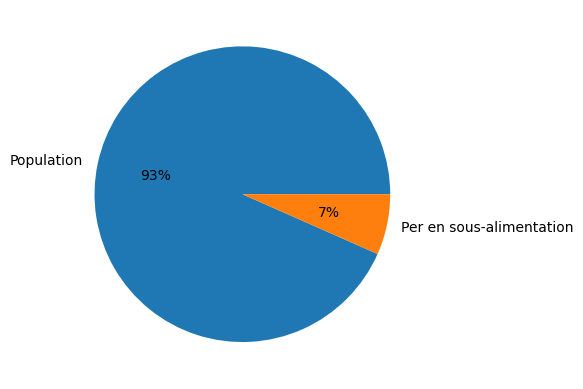

In [40]:
# Je présente le résultat dans un graphique
variable = [popu_2017, snt_2017]
names = ["Population", "Per en sous-alimentation"]
plt.pie(variable, labels= names, autopct= '%0.0f%%')
plt.show()

### Question 2: Le nombre théorique de personnes qui pourraient être nourries en 2017

#### Recherche sur le site de l'OMS des besoins énergétiques journaliers en kcal pour une personne

In [41]:
# L'OMS précise que les besoins énergétiques journaliers en kcal pour une personne sont compris entre 1800 - 2700 kcal, j'ai donc pris la valeur moyenne.
AJR = 2500
print('Les besoins énergétiques journaliers en kcal pour une personne sont de', AJR, 'kcal.') 

Les besoins énergétiques journaliers en kcal pour une personne sont de 2500 kcal.


In [42]:
# 1- Je join le df popu au df dispo et je l'affiche
popu_dispo_2017 = pd.merge(popu.loc[popu['Année'] == 2017,['Pays', 'Population']] , dispo , on = 'Pays', how = 'right')
popu_dispo_2017.head()                                                                                                               

,Pays,Population,Produit,Type,Aliments pour animaux,Autres Utilisations en 1000 T,Dispo alimentaire en calorie reelle,Dispo alimentaire en g/per/jour,Dispo matière grasse en g/per/jour,Dispo protéines en g/per/jour,Disponibilité intérieure en 1000 T,Exportations en 1000 T,Importations en 1000 T,Nourriture en 1000 T,Pertes en 1000 T,Production en 1000 T,Semences en 1000 T,Traitement en 1000 T,Variation de stock en 1000 T
0,Afghanistan,36296113.0,Abats Comestible,animale,0.0,0.0,5.0,4.712329,0.20,0.77,53.0,0.0,0.0,53.0,0.0,53.0,0.0,0.0,0.0
1,Afghanistan,36296113.0,"Agrumes, Autres",vegetale,0.0,0.0,1.0,3.534247,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,0.0,0.0,0.0
2,Afghanistan,36296113.0,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.164384,0.01,0.03,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,36296113.0,Ananas,vegetale,0.0,0.0,0.0,0.000000,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,36296113.0,Bananes,vegetale,0.0,0.0,4.0,7.397260,0.02,0.05,82.0,0.0,82.0,82.0,0.0,0.0,0.0,0.0,0.0


In [43]:
# 2- Je calcule la dispo alimentaire en kcal annelle pour la population de chaque pays:
popu_dispo_2017['dispo_alimentaire_par_pays'] = popu_dispo_2017['Dispo alimentaire en calorie reelle'] * popu_dispo_2017['Population']*365
popu_dispo_2017.head()

,Pays,Population,Produit,Type,Aliments pour animaux,Autres Utilisations en 1000 T,Dispo alimentaire en calorie reelle,Dispo alimentaire en g/per/jour,Dispo matière grasse en g/per/jour,Dispo protéines en g/per/jour,Disponibilité intérieure en 1000 T,Exportations en 1000 T,Importations en 1000 T,Nourriture en 1000 T,Pertes en 1000 T,Production en 1000 T,Semences en 1000 T,Traitement en 1000 T,Variation de stock en 1000 T,dispo_alimentaire_par_pays
0,Afghanistan,36296113.0,Abats Comestible,animale,0.0,0.0,5.0,4.712329,0.20,0.77,53.0,0.0,0.0,53.0,0.0,53.0,0.0,0.0,0.0,6.624041e+10
1,Afghanistan,36296113.0,"Agrumes, Autres",vegetale,0.0,0.0,1.0,3.534247,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,0.0,0.0,0.0,1.324808e+10
2,Afghanistan,36296113.0,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.164384,0.01,0.03,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.324808e+10
3,Afghanistan,36296113.0,Ananas,vegetale,0.0,0.0,0.0,0.000000,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00
4,Afghanistan,36296113.0,Bananes,vegetale,0.0,0.0,4.0,7.397260,0.02,0.05,82.0,0.0,82.0,82.0,0.0,0.0,0.0,0.0,0.0,5.299232e+10


In [44]:
# 3- Je calcule le besoin kcal par personne à l'année
besoin_kcal_année = AJR *365 
print("Les besoins énergétiques journaliers en kcal pour une personne à l'année sont de", besoin_kcal_année, "kcal.")

Les besoins énergétiques journaliers en kcal pour une personne à l'année sont de 912500 kcal.


In [45]:
# 4- Je calcule combien de personne auraient pu etre nourries en 2017
nombre_personne = round(popu_dispo_2017['dispo_alimentaire_par_pays'].sum() / besoin_kcal_année ,2)
print('Le nombre théorique de personnes qui auraient pu être nourries en 2017 est de', nombre_personne)

Le nombre théorique de personnes qui auraient pu être nourries en 2017 est de 8367593843.6


In [46]:
# 5- J'affiche le resultat en %         
resultat = round(( nombre_personne / popu_2017 *100),2)
print('La proportion de personnes qui auraient pu être nourries en 2017 est de', resultat, '% de la population mondiale.')

La proportion de personnes qui auraient pu être nourries en 2017 est de 110.86 % de la population mondiale.


### Question 3: La disponibilité alimentaire des produits végétaux pour l'année 2017

In [47]:
# 1- Je filtre à partir du df précédent les ptroduits végétaux
dispo_produits_vegetaux = popu_dispo_2017.loc[popu_dispo_2017['Type'] == "vegetale",:]   
dispo_produits_vegetaux.head()

,Pays,Population,Produit,Type,Aliments pour animaux,Autres Utilisations en 1000 T,Dispo alimentaire en calorie reelle,Dispo alimentaire en g/per/jour,Dispo matière grasse en g/per/jour,Dispo protéines en g/per/jour,Disponibilité intérieure en 1000 T,Exportations en 1000 T,Importations en 1000 T,Nourriture en 1000 T,Pertes en 1000 T,Production en 1000 T,Semences en 1000 T,Traitement en 1000 T,Variation de stock en 1000 T,dispo_alimentaire_par_pays
1,Afghanistan,36296113.0,"Agrumes, Autres",vegetale,0.0,0.0,1.0,3.534247,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,0.0,0.0,0.0,1.324808e+10
2,Afghanistan,36296113.0,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.164384,0.01,0.03,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.324808e+10
3,Afghanistan,36296113.0,Ananas,vegetale,0.0,0.0,0.0,0.000000,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00
4,Afghanistan,36296113.0,Bananes,vegetale,0.0,0.0,4.0,7.397260,0.02,0.05,82.0,0.0,82.0,82.0,0.0,0.0,0.0,0.0,0.0,5.299232e+10
6,Afghanistan,36296113.0,Bière,vegetale,0.0,0.0,0.0,0.246575,0.00,0.00,3.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00


In [48]:
# 2- Je calcule la dispo alimentaire des produits végétaux 
dispo_produits_vegetaux['dispo alimentaire végétaux'] = dispo_produits_vegetaux['Dispo alimentaire en calorie reelle'] * dispo_produits_vegetaux['Population']*365

In [49]:
# 3- Je calcule combien de personne auraient pu etre nourries en 2017 en produit végétaux et j'affiche le résultat en %
nombre_personne_en_vege = round(dispo_produits_vegetaux['dispo alimentaire végétaux'].sum() / besoin_kcal_année ,2)
resultat_proportion = round((nombre_personne_en_vege /popu_2017 *100),2)
print("La disponibilité alimentaire des produits végétaux pour l'année 2017 était de", resultat_proportion, '%')

La disponibilité alimentaire des produits végétaux pour l'année 2017 était de 91.47 %


### Question 4: L’utilisation de la disponibilité intérieure: part attribuée à l’alimentation animale, les pertes et        l'alimentation humaine.  



In [50]:
# 1- Je calcule la somme de l'ensemble des variables concernées 
dispo_alimentaire = dispo['Disponibilité intérieure en 1000 T'].sum()
aliment_animaux = dispo['Aliments pour animaux'].sum()
perte = dispo['Pertes en 1000 T'].sum()
nouriture = dispo['Nourriture en  1000 T'].sum()

# 2- Je calcule la proportion de chaque part
part_aliment_animaux = round(aliment_animaux/dispo_alimentaire*100, 2)
part_perte = round(perte/dispo_alimentaire*100, 2)       
part_nouriture = round(nouriture/dispo_alimentaire*100, 2)

print('La part qui est attribuée à l’alimentation animale est de', part_aliment_animaux, '%')
print('La part qui est perdue est de', part_perte, '%')
print("La part qui est attribuée l'alimentation humaine", part_nouriture, '%')

La part qui est attribuée à l’alimentation animale est de 13.24 %
La part qui est perdue est de 4.61 %
La part qui est attribuée l'alimentation humaine 49.51 %


## 5.Questions de Mélanie


### Question 1: Les pays pour lesquels la proportion de personnes sous-alimentées est la plus forte en 2017

In [51]:
# 1- Je join le df insecu au df popu via pays en filtrant 2 fois sur l'année 2017
popu_sous_nut_2017 = pd.merge(insecu.loc[insecu['Année'] == 2017,['Pays','Per en sous-alimentation']], popu.loc[popu['Année']==2017,['Pays','Population']], on ='Pays')
popu_sous_nut_2017.head()

,Pays,Per en sous-alimentation,Population
0,Afghanistan,10500000,36296113
1,Afrique du Sud,3100000,57009756
2,Albanie,100000,2884169
3,Algérie,1300000,41389189
4,Angola,5800000,29816766


In [52]:
# 2- Je calcule la proportion et je l'affiche dans une variable nommé proportion
popu_sous_nut_2017['Proportion'] = round((popu_sous_nut_2017['Per en sous-alimentation']/popu_sous_nut_2017['Population']*100),2)
popu_sous_nut_2017.head()

,Pays,Per en sous-alimentation,Population,Proportion
0,Afghanistan,10500000,36296113,28.93
1,Afrique du Sud,3100000,57009756,5.44
2,Albanie,100000,2884169,3.47
3,Algérie,1300000,41389189,3.14
4,Angola,5800000,29816766,19.45


In [53]:
# 3- Je classe les proportions par ordre décroissant                        
ordre_proportion = popu_sous_nut_2017.sort_values(by='Proportion', ascending =False)
ordre_proportion.head(10)

,Pays,Per en sous-alimentation,Population,Proportion
41,Haïti,5300000,10982366,48.26
82,République populaire démocratique de Corée,12000000,25429825,47.19
57,Madagascar,10500000,25570512,41.06
55,Libéria,1800000,4702226,38.28
53,Lesotho,800000,2091534,38.25
94,Tchad,5700000,15016753,37.96
84,Rwanda,4200000,11980961,35.06
66,Mozambique,9400000,28649018,32.81
96,Timor-Leste,400000,1243258,32.17
0,Afghanistan,10500000,36296113,28.93


### Question 2: Les pays qui ont le plus bénéficié d’aide depuis 2013

In [54]:
# 1- Je groupe par pays en calculant la somme de l'aide alimentaire donnée en tonnes 
pays = aides.groupby('Pays').sum()[['Aide alimentaire donnée en T']].copy()
# 2- Je classe les pays qui ont le plus bénéficié d’aide depuis 2013 par ordre décroissant dans mon print
print(pays.sort_values(by=['Aide alimentaire donnée en T'], ascending =False).head(10))

                                  Aide alimentaire donnée en T
Pays                                                          
République arabe syrienne                              1858943
Éthiopie                                               1381294
Yémen                                                  1206484
Soudan du Sud                                           695248
Soudan                                                  669784
Kenya                                                   552836
Bangladesh                                              348188
Somalie                                                 292678
République démocratique du Congo                        288502
Niger                                                   276344


#### Les pays qui ont le plus bénéficiés d'aide depuis 2013 sont les pays qui sont en guerre comme la Syrie et le Yemen, ou avec un pib très faible comme le Soudan du Sud, Somalie et le Bangladesh etc.






### Question 3: Les pays ayant le plus/le moins de disponibilité/habitant


#### 3.1 Les pays ayant le plus disponibilité/habitant

In [55]:
# 1-Je calcule la dispo/habitant par pays et je classe par ordre décroissant et j'affiche les 10 pays avec le plus de dispo/habitant
dispo_alimentaire_habitant = dispo[['Pays', 'Dispo alimentaire en calorie reelle']] .groupby('Pays').sum().astype(int)
dispo_alimentaire_habitant.sort_values(by='Dispo alimentaire en calorie reelle', ascending =False).head(10)

,Dispo alimentaire en calorie reelle
Pays,
Autriche,3770
Belgique,3737
Turquie,3708
États-Unis d'Amérique,3682
Israël,3610
Irlande,3602
Italie,3578
Luxembourg,3540
Égypte,3518


#### 3.2 Les pays ayant le moins disponibilité/habitant

In [56]:
# 2- Je classe par ordre croissant et j'affiche les 10 pays avec le plus de dispo/habitant
dispo_alimentaire_habitant.sort_values(by='Dispo alimentaire en calorie reelle', ascending =True).head(10)

,Dispo alimentaire en calorie reelle
Pays,
République centrafricaine,1879
Zambie,1924
Madagascar,2056
Afghanistan,2087
Haïti,2089
République populaire démocratique de Corée,2093
Tchad,2109
Zimbabwe,2113
Ouganda,2126


## 6.Questions de Julien


### Question 1: Équation du type  A1 + A2 + … = disponibilité intérieure = B1 + B2 +...  



### L'équation : 
#### 'Production en 1000 T' + 'Importations en 1000 T' - 'Exportations en 1000 T' + 'Variation de stock en 1000 T' = Disponibilité interieur = 'disponibilité alimentaire' + 'Aliments pour animaux' + 'Semences en 1000 T' + 'Traitement en 1000 T' +  'Autres Utilisations en 1000 T' + 'Pertes en 1000 T'  

In [57]:
# 1- Exemple pour les 3 équations 
Thaïlande_manioc = dispo[(dispo['Pays'] == 'Thaïlande') & (dispo['Produit'] == 'Manioc')].sum()
Thaïlande_manioc

Pays                                   Thaïlande
Produit                                   Manioc
Type                                    vegetale
Aliments pour animaux                     1800.0
Autres Utilisations en 1000 T             2081.0
Dispo alimentaire en calorie reelle         40.0
Dispo alimentaire en g/per/jour        35.616438
 Dispo matière grasse en g/per/jour         0.05
Dispo protéines en g/per/jour               0.14
Disponibilité intérieure en 1000 T        6264.0
Exportations en 1000 T                   25214.0
Importations en 1000 T                    1250.0
Nourriture en  1000 T                      871.0
Pertes en 1000 T                          1511.0
Production en 1000 T                     30228.0
Semences en 1000 T                           0.0
Traitement en 1000 T                         0.0
Variation de stock en 1000 T                 0.0
dtype: object

In [58]:
#Disponibilité interieur 
dispo_1 = Thaïlande_manioc['Disponibilité intérieure en 1000 T'].sum()
print( 'Disponibilité intérieure en 1000 de tonnes = ', dispo_1.astype(int))

Disponibilité intérieure en 1000 de tonnes =  6264


In [59]:
#'Production en 1000 T' + 'Importations en 1000 T' - 'Exportations en 1000 T' + 'Variation de stock en 1000 T'
dispo_2 = (Thaïlande_manioc['Production en 1000 T'])+(Thaïlande_manioc['Importations en 1000 T'])-(Thaïlande_manioc['Exportations en 1000 T']) + (Thaïlande_manioc['Variation de stock en 1000 T'])
print( 'Disponibilité intérieure en 1000 de tonnes = ', dispo_2.astype(int))

Disponibilité intérieure en 1000 de tonnes =  6264


In [60]:
#'Nourriture en 1000 T' + 'Aliments pour animaux' + 'Semences en 1000 T' + 'Traitement en 1000 T' + 'Autres Utilisations en 1000 T' + Pertes en 1000 T
dispo_3 = (Thaïlande_manioc['Nourriture en  1000 T']) + (Thaïlande_manioc['Aliments pour animaux']) + (Thaïlande_manioc['Semences en 1000 T'])+ (Thaïlande_manioc['Traitement en 1000 T']) + (Thaïlande_manioc['Autres Utilisations en 1000 T']) + (Thaïlande_manioc['Pertes en 1000 T'])
print( 'Disponibilité intérieure en 1000 de tonnes = ', dispo_3.astype(int))

Disponibilité intérieure en 1000 de tonnes =  6263


### Question 2: L’utilisation des céréales, notamment la répartition entre l’alimentation humaine (colonne Nourriture) et l’alimentation pour animaux. 



#### Liste des céréales récupérée du site de la FAO

In [61]:
liste_cereales = ["Blé","Riz (Eq Blanchi)","Orge", "Maïs","Seigle","Avoine","Millet", "Sorgho", "Céréales, Autres"]

In [62]:
# 1- Je crée la df disponibilité céréale en appellant la liste de céréales créée au préalable
dispo_cereales = dispo.loc[dispo['Produit'].isin(liste_cereales), :]
dispo_cereales.head()

,Pays,Produit,Type,Aliments pour animaux,Autres Utilisations en 1000 T,Dispo alimentaire en calorie reelle,Dispo alimentaire en g/per/jour,Dispo matière grasse en g/per/jour,Dispo protéines en g/per/jour,Disponibilité intérieure en 1000 T,Exportations en 1000 T,Importations en 1000 T,Nourriture en 1000 T,Pertes en 1000 T,Production en 1000 T,Semences en 1000 T,Traitement en 1000 T,Variation de stock en 1000 T
7,Afghanistan,Blé,vegetale,0.0,0.0,1369.0,438.986301,4.69,36.91,5992.0,0.0,1173.0,4895.0,775.0,5169.0,322.0,0.0,-350.0
12,Afghanistan,"Céréales, Autres",vegetale,0.0,0.0,0.0,0.000000,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32,Afghanistan,Maïs,vegetale,200.0,0.0,21.0,6.849315,0.30,0.56,313.0,0.0,1.0,76.0,31.0,312.0,5.0,0.0,0.0
34,Afghanistan,Millet,vegetale,0.0,0.0,3.0,1.095890,0.02,0.08,13.0,0.0,0.0,12.0,1.0,13.0,0.0,0.0,0.0
40,Afghanistan,Orge,vegetale,360.0,0.0,26.0,8.000000,0.24,0.79,524.0,0.0,10.0,89.0,52.0,514.0,22.0,0.0,0.0


In [63]:
# Je vérifie ma liste 
dispo_cereales['Produit'].unique()

array(['Blé', 'Céréales, Autres', 'Maïs', 'Millet', 'Orge',
       'Riz (Eq Blanchi)', 'Avoine', 'Seigle', 'Sorgho'], dtype=object)

In [64]:
# 3- Je calcule la part de production pour l'alimentation humaine que j'affiche en %
cereale_alimentation_humaine = round((dispo_cereales['Nourriture en  1000 T'].sum()*100) / dispo_cereales['Disponibilité intérieure en 1000 T'].sum(),2)
print("La part de production pour l'alimentation humaine est de", cereale_alimentation_humaine, '%' )

La part de production pour l'alimentation humaine est de 42.75 %


In [65]:
# 4- Je calcule la part de production pour l'alimentation animale que j'affiche en %
cereale_animaux = round((dispo_cereales['Aliments pour animaux'].sum()*100) / dispo_cereales['Disponibilité intérieure en 1000 T'].sum(),2)
print(" La part de production pour l'alimentation animale est de", cereale_animaux, '%' )

 La part de production pour l'alimentation animale est de 36.29 %


### Question 3:  Utilisation du manioc par la Thaïlande aux égards de la proportion de personnes en sous-nutrition.

#### 3.1 Calcule de la proportion de manioc exporté

In [66]:
# 1- Je crée le df manioc_Thaïlande
manioc_Thaïlande = dispo.loc[(dispo['Pays'] == 'Thaïlande') & (dispo['Produit']== 'Manioc'),['Production en 1000 T', 'Exportations en 1000 T']].astype(int)
manioc_Thaïlande.head()

,Production en 1000 T,Exportations en 1000 T
13809,30228,25214


In [67]:
# 2- Je calcule la proportion de manioc exportée et je l'affiche dans une variable appelée Proportion
manioc_Thaïlande['Proportion'] = round((manioc_Thaïlande['Exportations en 1000 T']*100)/ manioc_Thaïlande['Production en 1000 T'],2)
manioc_Thaïlande.head()

,Production en 1000 T,Exportations en 1000 T,Proportion
13809,30228,25214,83.41


In [68]:
# 3-  J'affiche le resultat obtenu dans le calcule précédent 
resultat = manioc_Thaïlande['Proportion'].sum()
print('La proportion de manioc exportée en 2018 était de', resultat, '%' )

La proportion de manioc exportée en 2018 était de 83.41 %


#### 3.2 Calcule de la proportion de personnes en sous-nutrition

In [69]:
# 1- J'affiche la population de la Thaïlande à partir du df popu 
popu_thai = popu.loc[popu['Pays'] == "Thaïlande" , :]
popu_thai.head(6)

,Pays,Année,Population
1308,Thaïlande,2013,68144518
1309,Thaïlande,2014,68438746
1310,Thaïlande,2015,68714511
1311,Thaïlande,2016,68971308
1312,Thaïlande,2017,69209810
1313,Thaïlande,2018,69428453


In [70]:
# 2- J'affiche le nombre de personne en sous nutrition  en Thaïlande à partir du df insecu
insecu_thai = insecu.loc[insecu['Pays'] == "Thaïlande",  :]
insecu_thai.head(6)

,Pays,Année,Per en sous-alimentation
1110,Thaïlande,2013,6200000
1111,Thaïlande,2014,6000000
1112,Thaïlande,2015,5900000
1113,Thaïlande,2016,6000000
1114,Thaïlande,2017,6200000
1115,Thaïlande,2018,6500000


In [71]:
# 3- Je calcule la proportion de de personnes en état de sous-nutrition la dernière année de mon df (ici 2018 = iloc 5)
proportion_sous_nutrition_Thaïlande = round((insecu_thai['Per en sous-alimentation'].iloc[5]*100)/popu_thai['Population'].iloc[5],2)
print('En 2018, la proportion de personnes en état de sous nutrition en Thaïlande était de', proportion_sous_nutrition_Thaïlande, '%')

En 2018, la proportion de personnes en état de sous nutrition en Thaïlande était de 9.36 %


#### En 2018, 9.36 % de la population Thaïlandaise était en sous nutrition, alors que plus de 83 % du manioc produit avait été exporté. 